In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('..')

from gym_minigrid_navigation.utils import show_video
from navigation_policy import gen_env, get_agent, run_episode, run_episodes

from rewards import get_reward_function
from utils import init_logger, switch_reproducibility_on, display_stats

init_logger('dqn')
init_logger('navigation_policy')
init_logger('gym_minigrid_navigation.environments')

### config 

In [4]:
from pyhocon import ConfigFactory

config = ConfigFactory.parse_file('../conf/minigrid_dqn_navigation_rgb_cnn.hocon')
config['env']['video_path'] = '../outputs/video/'

In [5]:
switch_reproducibility_on(config['seed'])

### environment 

In [6]:
reward_functions = get_reward_function(config)
env = gen_env(config['env'], reward_functions)

### agent 

In [7]:
from utils import init_logger

agent = get_agent(env, config)

2021-02-04 16:07:52,205 INFO    dqn                    : Running on device: cuda:0


### trainings 

2021-02-04 16:10:35,457 INFO    navigation_policy      : Episode: 100. Average score: -17.63850367397397. Average steps: 67.4
2021-02-04 16:11:30,116 INFO    navigation_policy      : Episode: 200. Average score: -3.261909643051273. Average steps: 22.71
2021-02-04 16:11:56,044 INFO    navigation_policy      : Episode: 300. Average score: 0.3377220106778591. Average steps: 10.81
2021-02-04 16:12:20,447 INFO    navigation_policy      : Episode: 400. Average score: 0.4568003976980578. Average steps: 10.15
2021-02-04 16:12:49,711 INFO    navigation_policy      : Episode: 500. Average score: -0.05904356362389691. Average steps: 12.14
2021-02-04 16:13:11,641 INFO    navigation_policy      : Episode: 600. Average score: 0.8416107863329043. Average steps: 9.02
2021-02-04 16:13:29,543 INFO    navigation_policy      : Episode: 700. Average score: 1.336616310839094. Average steps: 7.36
2021-02-04 16:13:50,372 INFO    navigation_policy      : Episode: 800. Average score: 1.1479088374999071. Average

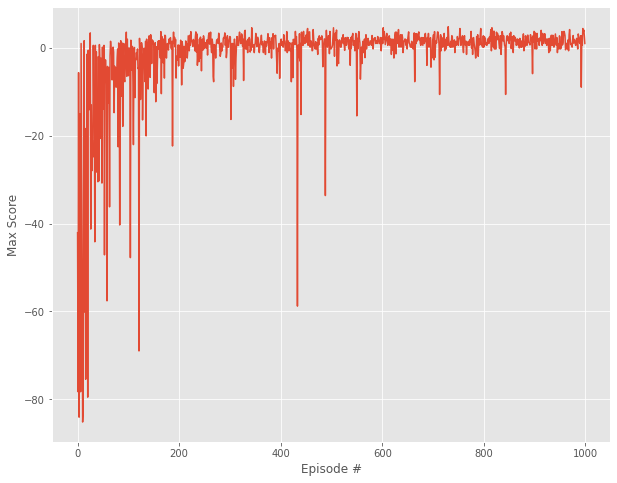

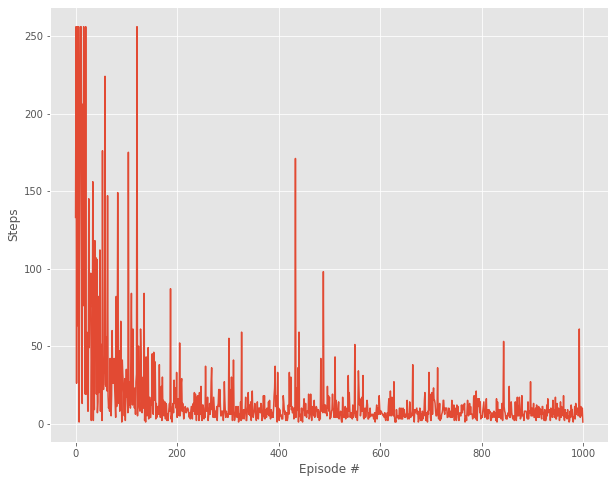

In [8]:
scores, steps = run_episodes(env, agent, n_episodes=config['training.n_episodes'], verbose=config['training.verbose'])

display_stats(scores, steps)

### visualisation 

In [9]:
env = gen_env(config['env'], reward_functions, verbose=True)
print(run_episode(env, agent, train_mode=False))

show_video()

2021-02-04 16:14:27,742 INFO    gym_minigrid_navigation.environments   : From [2 5] to [1 5]


(0.1715728752538097, 3)


In [10]:
stop

NameError: name 'stop' is not defined

In [ ]:
agent.qnetwork_target.master

In [ ]:
model = agent.qnetwork_target.master
model.output_size

In [ ]:
state = env.reset()
states = agent._vstack([state] * 6)
states.shape

In [ ]:
model(states).shape

In [ ]:
config['env.grid_size'] * config['env'].get('tile_size', 1)

In [ ]:
(64 - 6) // 8 - 1